In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_results(model_name):

    results = pd.read_csv(f"../results{model_name}.csv")
    # results = results.drop(results[results['tuning'] != 'standard'].index)

    fig, ax = plt.subplots(figsize=(20, 5))

    # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning', 'inv_L_prop']].apply(
    # lambda row: f"{row.integrator}, {row.preconditioning}, {row.inv_L_prop}", axis=1), ax=ax)

    results = results.drop(results[results['inv_L_prop'] != 0.0].index)
    sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning']].apply(
    lambda row: f"{row.integrator}, {row.preconditioning}", axis=1), ax=ax)

    plt.xlabel("Sampler")
    plt.ylabel("ESS")
    plt.title(model_name)
    plt.show()
    plt.show()
    display(results)


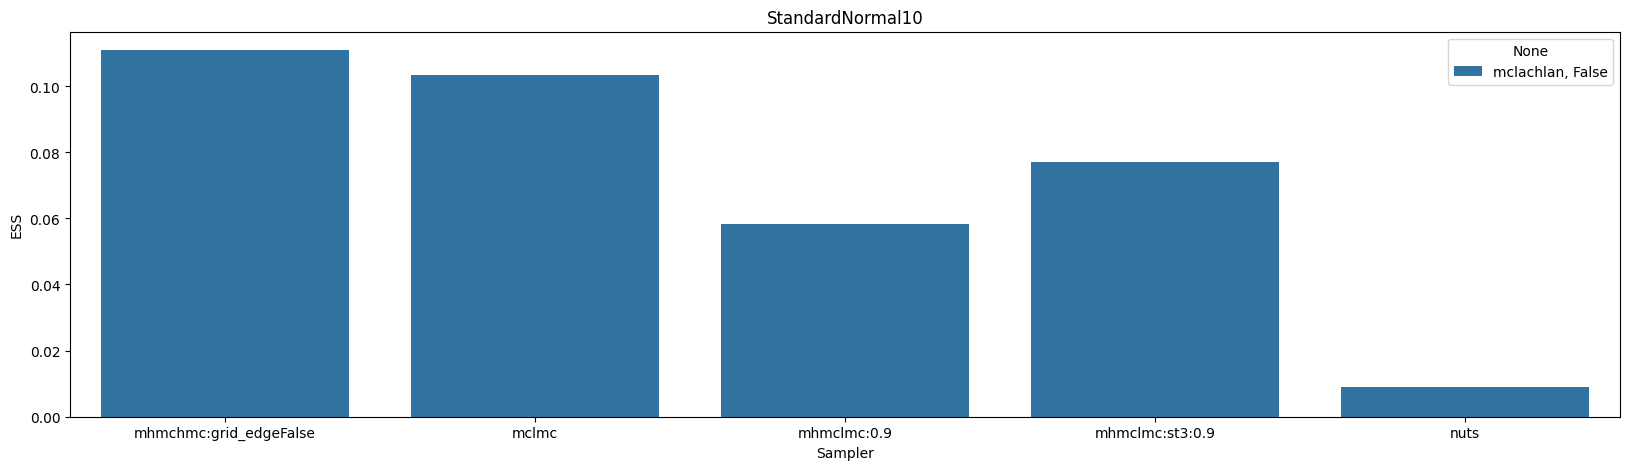

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,StandardNormal,10,mhmchmc:grid_edgeFalse,4.670475,4.614420,mclachlan,gridsearch,0.941468,False,0.0,0.429564,NaN,2000,0.111011
1,StandardNormal,10,mclmc,2.637351,3.585087,mclachlan,standard,1.000000,False,0.0,0.403226,NaN,2000,0.103520
2,StandardNormal,10,mhmclmc:0.9,3.145472,2.859519,mclachlan,standard,0.987079,False,0.0,0.237982,NaN,2000,0.058200
3,StandardNormal,10,mhmclmc:st3:0.9,4.040694,3.673357,mclachlan,standard,0.970466,False,0.0,0.317864,NaN,2000,0.077172
4,StandardNormal,10,nuts,0.000000,0.000000,mclachlan,standard,0.808576,False,0.0,0.031424,NaN,2000,0.008819


In [12]:
load_results("StandardNormal10")

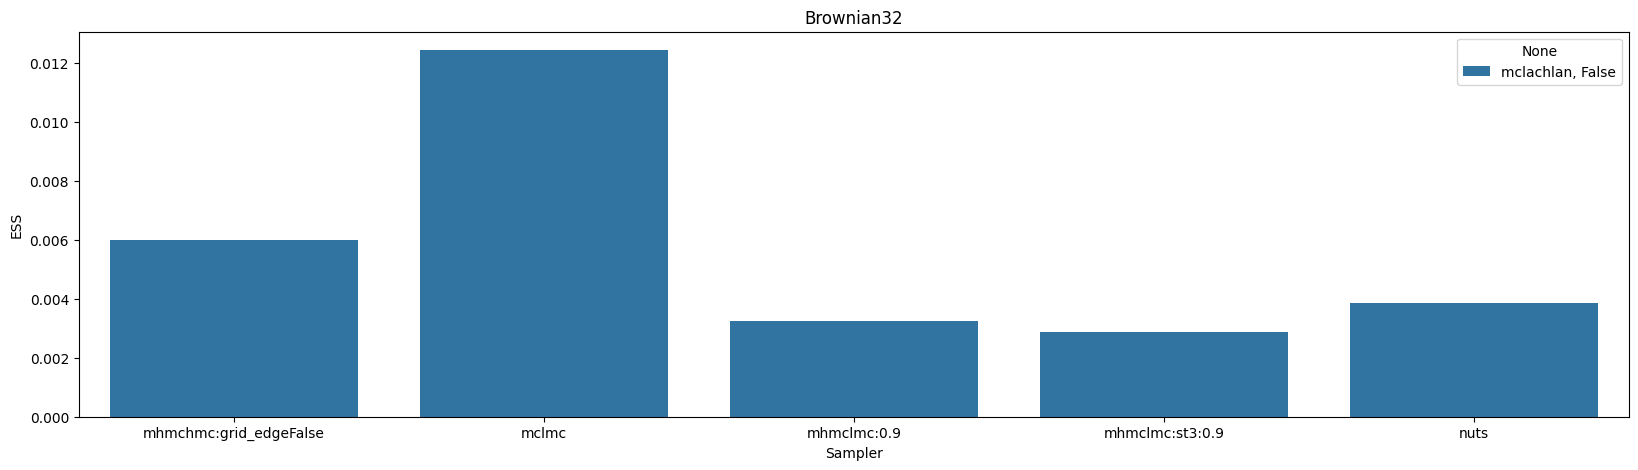

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,Brownian,32,mhmchmc:grid_edgeFalse,2.379265,0.382358,mclachlan,gridsearch,0.827955,False,0.0,0.038446,NaN,20000,0.005987
1,Brownian,32,mclmc,2.231286,0.311349,mclachlan,standard,1.000000,False,0.0,0.072464,NaN,20000,0.012447
2,Brownian,32,mhmclmc:0.9,0.824557,0.404582,mclachlan,standard,0.845007,False,0.0,0.020186,NaN,20000,0.003257
3,Brownian,32,mhmclmc:st3:0.9,5.796056,0.295732,mclachlan,standard,0.885229,False,0.0,0.018157,NaN,20000,0.002863
4,Brownian,32,nuts,0.000000,0.000000,mclachlan,standard,0.791696,False,0.0,0.017400,NaN,20000,0.003868


In [9]:
# load_results("IllConditionedGaussian")
load_results("Brownian32")
# load_results("Funnel")
# load_results("Banana")
# load_results("StochasticVolatility")
# load_results("GermanCredit")

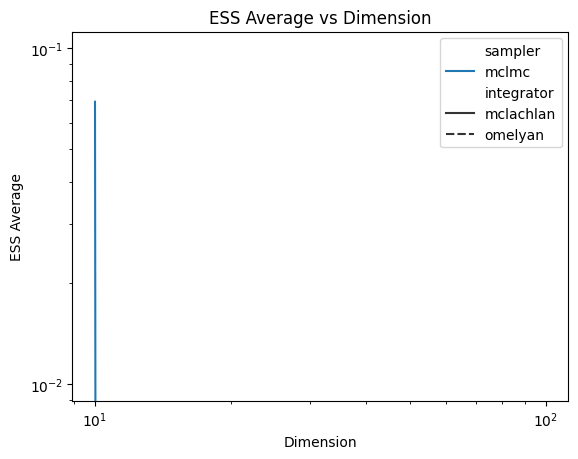

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../omelyan.csv')

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')

plot = sns.lineplot(data=df, x="dims", y="ESS", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()
